# Исследование для НКО "Благотворительная больница"


Заказчик: в данном проекте является НКО "Благотворительная больница", организация оказывает медико-социальную помощь бездомным людям Петербурга с 2018 года.

Цель проекта: проанализировать эффективность маркетингового подхода на основе данных о пожертвованиях и рекламных кампаниях.


## Описание данных
Заказчиком были выданы обезличенные данные о платежах. Данные выкачаны из двух систем, некоторые платежи присутствуют в обоих файлах. Колонка Код создана для поиска пересечений по файлам.
Также были выданы данные Я.метрики (только за 2023 год) о проведённых рекламных компаниях.


## Ход исследования
1. Знакомство с данными
2. Очистка данных (удаление лишнего).
3. Объединение данных.
4. Обработка дубликатов.
5. Преобазование типов данных.
5. Обработка пропусков.
5. Анализ маркетинговых компаний.
  - Срез по клиентам.
  - Изучение конверсий.
  - Денежные поступления.

## Знакомство с данными

In [216]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

In [217]:
clients = pd.read_excel('/content/drive/MyDrive/Projects/Больничка/clients.xlsx')
display(clients)
clients.info()

,id,Первый платеж,Подписки вкл,Подписки выкл,Типы оплаты,Платежей за год,Сумма за год,Средний платеж в год,Всего платежей,Сумма всего,Средний платеж,Сумма за месяц,Страны,Регионы,Последний платеж,код
0,707634,2021-12-28 16:54:52,0,0,карта,0,0,0,0,0,0,0,NaN,NaN,2021-12-28 16:54:52,1118
1,789437,2022-03-12 00:16:40,0,0,карта,0,0,0,0,0,0,0,NaN,NaN,2022-03-12 00:16:40,1119
2,1078426,2022-11-23 12:55:04,0,0,NaN,0,0,0,0,0,0,0,NaN,NaN,2022-11-23 12:55:04,1120
3,1078667,2022-11-23 16:28:46,0,0,NaN,1,500,500,1,500,500,0,Россия,Ленинградская обл.,2022-11-23 16:28:46,1121
4,708416,2021-12-29 17:04:26,0,0,карта,1,1000,1000,1,1000,1000,0,Россия,Кунене,2021-12-29 17:04:26,1122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161,1498729,2023-05-31 15:36:27,1,0,карта,1,200,200,1,200,200,0,Франция,Бургундия — Франш-Конте,2023-05-31 15:36:27,2279
1162,1499774,2023-06-01 09:50:18,1,0,"карта,терм,СБП",3,110,36.66,3,110,36.66,0,Нидерланды\nРоссия,Северная Голландия\nСанкт-Петербург,2023-06-01 12:46:51,2280
1163,1155976,2023-01-01 14:07:53,1,0,карта,6,3000,500,6,3000,500,0,Россия,Санкт-Петербург,2023-06-01 14:07:53,2281
1164,1152171,2022-12-29 21:43:35,1,0,карта,6,1200,200,6,1200,200,0,Нидерланды,Южная Голландия,2023-06-01 21:43:37,2282


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1166 entries, 0 to 1165
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    1166 non-null   int64         
 1   Первый платеж         1166 non-null   datetime64[ns]
 2   Подписки вкл          1166 non-null   int64         
 3   Подписки выкл         1166 non-null   int64         
 4   Типы оплаты           998 non-null    object        
 5   Платежей за год       1166 non-null   int64         
 6   Сумма за год          1166 non-null   int64         
 7   Средний платеж в год  1166 non-null   object        
 8   Всего платежей        1166 non-null   int64         
 9   Сумма всего           1166 non-null   int64         
 10  Средний платеж        1166 non-null   object        
 11  Сумма за месяц        1166 non-null   int64         
 12  Страны                922 non-null    object        
 13  Регионы           

Стоит обратить внимание, что все данные о платежах следует перевести в тип float.
Обратим внимание, что есть флаги с подписками, изучим это подробно, т.к. не исключено, что признаки нужно будет удалить.

Видно, что есть пропуски и ненужные данные в виде id.

In [218]:
donors = pd.read_excel('/content/drive/MyDrive/Projects/Больничка/donors (1).xlsx')
display(donors)
donors.info()

,ID,Тип донора,Дата первого пожертвования,Сумма первого пожертвования,Кампания первого пожертвования,Метки донора,Кампании,Платёжные операторы,Дата последнего пожертвования,Сумма последнего пожертвования,Кампания последнего пожертвования,Общая сумма пожертвований,Валюта,Код
0,833,разовый,"21.06.2023, 18:43",3000.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"21.06.2023, 18:43",3000.0,На уставную деятельность и содержание организации,3000,₽,2285
1,832,постоянный,"20.06.2023, 16:36",500.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"20.06.2023, 16:40",500.0,На уставную деятельность и содержание организации,500,₽,2286
2,831,постоянный,"20.06.2023, 10:39",500.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"20.06.2023, 10:39",500.0,На уставную деятельность и содержание организации,500,₽,1479
3,830,разовый,"20.06.2023, 09:09",1000.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"20.06.2023, 09:09",1000.0,На уставную деятельность и содержание организации,1000,₽,2288
4,829,постоянный,"19.06.2023, 23:03",100.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"19.06.2023, 23:03",100.0,На уставную деятельность и содержание организации,100,₽,2289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,16,постоянный,"18.08.2022, 14:38",55.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"18.08.2022, 14:38",55.0,На уставную деятельность и содержание организации,55,₽,1513
809,15,разовый,"18.02.2023, 14:32",50.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"18.06.2023, 14:31",50.0,На уставную деятельность и содержание организации,250,₽,3094
810,14,постоянный,"12.08.2022, 17:05",50.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"23.11.2022, 11:24",50.0,На уставную деятельность и содержание организации,151,₽,1509
811,13,постоянный,"17.08.2022, 23:21",50.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"17.12.2022, 23:22",50.0,На уставную деятельность и содержание организации,405,₽,1512


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 813 non-null    int64  
 1   Тип донора                         813 non-null    object 
 2   Дата первого пожертвования         795 non-null    object 
 3   Сумма первого пожертвования        795 non-null    float64
 4   Кампания первого пожертвования     795 non-null    object 
 5   Метки донора                       0 non-null      float64
 6   Кампании                           795 non-null    object 
 7   Платёжные операторы                795 non-null    object 
 8   Дата последнего пожертвования      795 non-null    object 
 9   Сумма последнего пожертвования     795 non-null    float64
 10  Кампания последнего пожертвования  795 non-null    object 
 11  Общая сумма пожертвований          813 non-null    int64  

Метки донора являются лишним признаком для нас в этой таблице. Также посмотрим на платёжных операторов.

In [219]:
grants =pd.read_csv('/content/drive/MyDrive/Projects/Больничка/2022-07-19_2023-07-19_adgrants-charityhospital (1).csv', sep = ';', skiprows=4)
display(grants)
grants.info()

,Дата,Кампания,№ Кампании,Метка,Условие показа,Пол,Уровень платежеспособности,Возраст,Показы,Взвешенные показы,...,Доля проигрываний 25% ролика (%),Доля проигрываний 50% ролика (%),Доля проигрываний 75% ролика (%),Доля проигрываний 100% ролика (%),Ср. цена досмотра 100% ролика (руб.),"Видимые показы, стандарт MRC","Невидимые показы, стандарт MRC","Неустановленные показы, стандарт MRC","Доля измеряемых показов, стандарт MRC (%)","Доля видимых показов, стандарт MRC (%)"
0,15.01.2023,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,не определен,7,"7,00",...,-,-,-,-,-,-,-,-,-,-
1,15.01.2023,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,младше 18,4,"4,00",...,-,-,-,-,-,-,-,-,-,-
2,15.01.2023,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,18-24,2,"2,00",...,-,-,-,-,-,-,-,-,-,-
3,15.01.2023,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,25-34,1,"1,00",...,-,-,-,-,-,-,-,-,-,-
4,15.01.2023,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,35-44,1,"1,00",...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308018,19.07.2023,РК_Общий сбор_средств,89800500,без метки,'---autotargeting,женский,2-5%,25-34,2,"2,00",...,-,-,-,-,-,-,-,-,-,-
308019,19.07.2023,РК_Общий сбор_средств,89800500,без метки,'---autotargeting,женский,2-5%,35-44,3,"3,00",...,-,-,-,-,-,-,-,-,-,-
308020,19.07.2023,РК_Общий сбор_средств,89800500,без метки,'---autotargeting,женский,2-5%,45-54,1,"1,00",...,-,-,-,-,-,-,-,-,-,-
308021,19.07.2023,РК_Общий сбор_средств,89800500,без метки,'---autotargeting,женский,2-5%,старше 55,1,"1,00",...,-,-,-,-,-,-,-,-,-,-


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308023 entries, 0 to 308022
Data columns (total 46 columns):
 #   Column                                     Non-Null Count   Dtype 
---  ------                                     --------------   ----- 
 0   Дата                                       308023 non-null  object
 1   Кампания                                   308023 non-null  object
 2   № Кампании                                 308023 non-null  int64 
 3   Метка                                      308023 non-null  object
 4   Условие показа                             308023 non-null  object
 5   Пол                                        308023 non-null  object
 6   Уровень платежеспособности                 308023 non-null  object
 7   Возраст                                    308023 non-null  object
 8   Показы                                     308023 non-null  int64 
 9   Взвешенные показы                          308023 non-null  object
 10  Клики               

Предстоит довольно много работы с типами данных в столбцах. Также отметим, что данные относятся больше к маркетологам, запускающим компаним. В рамках нашего исследования мы оставим только нужные нам признаки.

## Удаление лишиних или пустых колонок
Поочередно изучим колонки в таблицах и сделаем выводы что нам может пригодится, а что нет.

### Исследуем таблицу clients

In [220]:
clients['Подписки вкл'].unique()

array([0, 1, 2])

In [221]:
clients['Подписки выкл'].unique()

array([0, 1, 3, 2, 4, 5])

Сделаем предположение, что цифры вданных значенияхозначают количество месяцев длительности подписки, или месяцы,в течение которых попдиска неактивна. Возможно, эти данные после помогут нам, как вспомогательный признак.

In [222]:
clients['Сумма за месяц'].unique()

array([0])

Этот столбец состоит только из 0, от него следует избавиться.

In [223]:
clients.groupby('Типы оплаты')['id'].count()

Типы оплаты
sms                    11
sms,карта              11
sms,карта,терм,СБП      3
sms,терм,СБП            2
карта                 714
карта,терм,СБП         59
терм,СБП              198
Name: id, dtype: int64

Эти данные пока что можно оставить, т.к. есть ощутимая доля второго канала оплат, при обработке данных следует привести всё в читаемый вид. Карты по числу оплат на первом месте, встречаются клиенты с несколькими типами оплаты.

In [224]:
clients[clients['Сумма за год'] < clients['Сумма всего']]

,id,Первый платеж,Подписки вкл,Подписки выкл,Типы оплаты,Платежей за год,Сумма за год,Средний платеж в год,Всего платежей,Сумма всего,Средний платеж,Сумма за месяц,Страны,Регионы,Последний платеж,код
26,704976,2021-12-26 01:27:10,0,3,карта,3,700,233.33,5,1100,220,0,Нидерланды\nРоссия\nСША,Кунене,2022-05-14 16:30:34,1144
27,716487,2022-01-19 16:35:08,0,1,карта,1,200,200,4,800,200,0,Россия\nСША,Кунене,2022-05-19 16:35:27,1145
40,705080,2021-12-26 14:24:00,0,1,карта,8,800,100,14,1400,100,0,Россия\nСША,Кандагар\nПриморский край,2023-02-26 14:27:46,1158
50,668536,2021-11-24 23:03:37,0,1,карта,1,500,500,3,1500,500,0,Россия\nСША,Кунене,2022-02-24 23:03:56,1168
73,757051,2022-02-04 23:25:48,0,1,карта,1,1000,1000,5,5000,1000,0,Россия\nСША,Кунене,2022-07-04 23:26:27,1191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,732441,2022-01-21 03:17:08,0,1,карта,6,300,50,9,450,50,0,Россия\nСША,Арагацотнская область\nCuando Cubango\nМосковс...,2022-11-20 18:42:34,2254
1139,802475,2022-03-30 22:52:21,1,0,карта,12,6000,500,14,7000,500,0,Россия,Шарджа\nКунене\nСанкт-Петербург,2023-05-29 21:10:29,2257
1147,848328,2022-05-24 17:31:17,0,1,карта,2,200,100,3,300,100,0,Россия,Кунене\nСанкт-Петербург,2022-08-24 17:31:19,2265
1150,756786,2022-02-04 09:16:11,1,1,"карта,терм,СБП",8,8000,1000,12,12000,1000,0,Россия\nСША,Котайк\nСвердловская обл.,2023-05-26 11:12:27,2268


Итого, у нас только 10% клиентов, которые начали донатить раньше текущего года. Предлагаю в анализе опираться на разделы со всеми данными.

In [225]:
clients = clients.drop(columns=['id','Сумма за месяц','Платежей за год','Сумма за год','Средний платеж в год','Средний платеж','Всего платежей','Регионы'])
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1166 entries, 0 to 1165
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Первый платеж     1166 non-null   datetime64[ns]
 1   Подписки вкл      1166 non-null   int64         
 2   Подписки выкл     1166 non-null   int64         
 3   Типы оплаты       998 non-null    object        
 4   Сумма всего       1166 non-null   int64         
 5   Страны            922 non-null    object        
 6   Последний платеж  1166 non-null   datetime64[ns]
 7   код               1166 non-null   int64         
dtypes: datetime64[ns](2), int64(4), object(2)
memory usage: 73.0+ KB


В рамках исследования, нам не так важны данные по регионам, поэтому для мы приняли решение отказаться от этой информации.

### Исследование donors

In [226]:
donors.groupby('Кампания первого пожертвования')['ID'].count()

Кампания первого пожертвования
#Больничкабежит                                        3
На уставную деятельность и содержание организации    792
Name: ID, dtype: int64

In [227]:
donors.groupby('Кампания последнего пожертвования')['ID'].count()

Кампания последнего пожертвования
#Больничкабежит                                        3
На уставную деятельность и содержание организации    792
Name: ID, dtype: int64

In [228]:
donors.groupby('Кампании')['ID'].count()

Кампании
#Больничкабежит                                                         3
#Больничкабежит, На уставную деятельность и содержание организации      1
На уставную деятельность и содержание организации                     791
Name: ID, dtype: int64

Итак, видим, что информация о компаниях не информативна, от этих данных следует также избавиться.  

In [229]:
donors.groupby('Платёжные операторы')['ID'].count()

Платёжные операторы
MIXPLAT                        765
MIXPLAT, Квитанции               8
MIXPLAT, Сбербанк Эквайринг     16
Сбербанк Эквайринг               6
Name: ID, dtype: int64

In [230]:
donors.groupby('Валюта')['ID'].count()

Валюта
₽    813
Name: ID, dtype: int64

В перечень удаляемых колонок также отнесём и платёжных операторов с валютой.

In [231]:
donors.groupby('Код')['Тип донора'].count().sort_values(ascending=False)

Код
1121    1
2438    1
2375    1
2378    1
2382    1
       ..
1870    1
1871    1
1872    1
1873    1
3097    1
Name: Тип донора, Length: 813, dtype: int64

Все коды являются уникальными, значит дубликатов поклиентам можемне ожидать.

In [232]:
donors = donors.drop(columns=['ID','Кампании','Платёжные операторы','Метки донора','Кампания первого пожертвования','Сумма первого пожертвования','Сумма последнего пожертвования','Кампания последнего пожертвования','Валюта'])
donors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Тип донора                     813 non-null    object
 1   Дата первого пожертвования     795 non-null    object
 2   Дата последнего пожертвования  795 non-null    object
 3   Общая сумма пожертвований      813 non-null    int64 
 4   Код                            813 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 31.9+ KB


## Исследование таблицы grants

In [233]:
grants.groupby('Кампания', as_index=False)['Дата'].count()

,Кампания,Дата
0,clinica/activists_volunteers/keys,7340
1,helpingwomen/feminism_keys,9475
2,Бизнесмены/ ремонт больнички,1598
3,Благотворители/ помощь бездомным женщинам,1396
4,Больничка_бизнес_ключи-интересы,6296
5,Верущие Автотаргетинг (Бездомные женщины),1511
6,Гео,28033
7,Кампания с фиксированным СРМ №10 от 14-03-2023,48
8,Команда#2 / Бот / СПб,34843
9,Культурно образованные (Больничка),5163


In [234]:
print(grants['Условие показа'].value_counts().reset_index())

                                index  Условие показа
0                   '---autotargeting           26006
1              благотворительный фонд            2769
2                    помощь бездомным            2273
3                         фонд помощи            2238
4                       пожертвование            2127
...                               ...             ...
1191                духовная культура               2
1192               почетный донор спб               1
1193                       асана йога               1
1194  донор санкт петербург -почетный               1
1195                         йога спб               1

[1196 rows x 2 columns]


In [235]:
grants.groupby('Метка')['Дата'].count()

Метка
без метки    308023
Name: Дата, dtype: int64

Считаю, что данные колонки неинформативны в рамказ текущего исследования, избавляемся от них. Практическое применение условию показа и компании можно найти.

In [236]:
grants = grants.drop(columns=['Кампания','Условие показа','Метка'])

Теперь разбёрмся с колонками метрик

In [237]:
grants.groupby('Ср. цена клика (руб.)')['Дата'].count()


Ср. цена клика (руб.)
-        290150
0,35          1
0,54          1
0,72          1
0,73          1
          ...  
99,48         1
99,59         1
99,69         1
99,72         1
99,77         1
Name: Дата, Length: 5973, dtype: int64

Очень много значений "-", предлагаю посчитать сколько их есть. Поменять на 0 , там где овзможно, остальные неинформативные данные удалить.

In [238]:
for c in grants.columns:
  count = grants[c].astype(str).str.count('-').sum()
  total_values = grants[c].count()
  fraction = count / total_values
  if count > 0:  print(f'В {c} знак встречается {count} раз, это {fraction:.2%} от общего числа значений')

В Уровень платежеспособности знак встречается 137743 раз, это 44.72% от общего числа значений
В Возраст знак встречается 211204 раз, это 68.57% от общего числа значений
В Ср. цена клика (руб.) знак встречается 290150 раз, это 94.20% от общего числа значений
В Ср. ставка за клик (руб.) знак встречается 290154 раз, это 94.20% от общего числа значений
В Ср. позиция показов знак встречается 308023 раз, это 100.00% от общего числа значений
В Ср. позиция кликов знак встречается 308023 раз, это 100.00% от общего числа значений
В Отказы (%) знак встречается 302377 раз, это 98.17% от общего числа значений
В Ср. цена тыс. показов (руб.) знак встречается 107 раз, это 0.03% от общего числа значений
В Глубина (стр.) знак встречается 302725 раз, это 98.28% от общего числа значений
В Конверсия (%) знак встречается 307627 раз, это 99.87% от общего числа значений
В Цена цели (руб.) знак встречается 307604 раз, это 99.86% от общего числа значений
В Конверсии знак встречается 307627 раз, это 99.87% от об

Кажется, настала пора избавиться от маркетинговых метрик, оставим только первые 10 колонок. При необходимости, вернёмся к исходному датасету.

In [239]:
adgrants = grants.iloc[:, :10]
adgrants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308023 entries, 0 to 308022
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Дата                        308023 non-null  object
 1   № Кампании                  308023 non-null  int64 
 2   Пол                         308023 non-null  object
 3   Уровень платежеспособности  308023 non-null  object
 4   Возраст                     308023 non-null  object
 5   Показы                      308023 non-null  int64 
 6   Взвешенные показы           308023 non-null  object
 7   Клики                       308023 non-null  int64 
 8   CTR (%)                     308023 non-null  object
 9   wCTR (%)                    308023 non-null  object
dtypes: int64(3), object(7)
memory usage: 23.5+ MB


## Объединение данных и преобразование их типов

Чтобы объединить таблицы, нужно соблюсти структуру, поэтому придётся переименовать колонки.

In [240]:
donors.columns = ['Тип донора', 'Первый платеж', 'Последний платеж','Сумма всего','Код']
donors = donors.reindex(columns=['Код','Тип донора', 'Первый платеж', 'Последний платеж','Сумма всего'])
donors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Код               813 non-null    int64 
 1   Тип донора        813 non-null    object
 2   Первый платеж     795 non-null    object
 3   Последний платеж  795 non-null    object
 4   Сумма всего       813 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 31.9+ KB


In [241]:
clients = clients.rename(columns={'код': 'Код'})
clients = clients.reindex(columns=['Код','Подписки вкл','Подписки выкл','Типы оплаты', 'Первый платеж', 'Последний платеж','Сумма всего','Страны'])
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1166 entries, 0 to 1165
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Код               1166 non-null   int64         
 1   Подписки вкл      1166 non-null   int64         
 2   Подписки выкл     1166 non-null   int64         
 3   Типы оплаты       998 non-null    object        
 4   Первый платеж     1166 non-null   datetime64[ns]
 5   Последний платеж  1166 non-null   datetime64[ns]
 6   Сумма всего       1166 non-null   int64         
 7   Страны            922 non-null    object        
dtypes: datetime64[ns](2), int64(4), object(2)
memory usage: 73.0+ KB


In [242]:
all = pd.concat([donors, clients], ignore_index=True)
all

,Код,Тип донора,Первый платеж,Последний платеж,Сумма всего,Подписки вкл,Подписки выкл,Типы оплаты,Страны
0,2285,разовый,"21.06.2023, 18:43","21.06.2023, 18:43",3000,NaN,NaN,NaN,NaN
1,2286,постоянный,"20.06.2023, 16:36","20.06.2023, 16:40",500,NaN,NaN,NaN,NaN
2,1479,постоянный,"20.06.2023, 10:39","20.06.2023, 10:39",500,NaN,NaN,NaN,NaN
3,2288,разовый,"20.06.2023, 09:09","20.06.2023, 09:09",1000,NaN,NaN,NaN,NaN
4,2289,постоянный,"19.06.2023, 23:03","19.06.2023, 23:03",100,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1974,2279,NaN,2023-05-31 15:36:27,2023-05-31 15:36:27,200,1.0,0.0,карта,Франция
1975,2280,NaN,2023-06-01 09:50:18,2023-06-01 12:46:51,110,1.0,0.0,"карта,терм,СБП",Нидерланды\nРоссия
1976,2281,NaN,2023-01-01 14:07:53,2023-06-01 14:07:53,3000,1.0,0.0,карта,Россия
1977,2282,NaN,2022-12-29 21:43:35,2023-06-01 21:43:37,1200,1.0,0.0,карта,Нидерланды


Сразу же переведём нужные нам колонки в двух таблицах в нужные типы.

In [243]:
all['Первый платеж'] = pd.to_datetime(all['Первый платеж']).dt.normalize()
all['Последний платеж'] = pd.to_datetime(all['Последний платеж']).dt.normalize()

In [244]:
adgrants['Дата'] = pd.to_datetime(adgrants['Дата']).dt.normalize()

In [245]:
adgrants['Взвешенные показы'] = adgrants['Взвешенные показы'].str.split(',').str[0].astype(int)
adgrants['CTR (%)'] = adgrants['CTR (%)'].str.replace(',', '.').astype(float)
adgrants['wCTR (%)'] = adgrants['wCTR (%)'].str.replace(',', '.').astype(float)
adgrants

,Дата,№ Кампании,Пол,Уровень платежеспособности,Возраст,Показы,Взвешенные показы,Клики,CTR (%),wCTR (%)
0,2023-01-15,82164908,не определен,Остальные,не определен,7,7,0,0.0,0.0
1,2023-01-15,82164908,не определен,Остальные,младше 18,4,4,0,0.0,0.0
2,2023-01-15,82164908,не определен,Остальные,18-24,2,2,0,0.0,0.0
3,2023-01-15,82164908,не определен,Остальные,25-34,1,1,0,0.0,0.0
4,2023-01-15,82164908,не определен,Остальные,35-44,1,1,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
308018,2023-07-19,89800500,женский,2-5%,25-34,2,2,0,0.0,0.0
308019,2023-07-19,89800500,женский,2-5%,35-44,3,3,0,0.0,0.0
308020,2023-07-19,89800500,женский,2-5%,45-54,1,1,0,0.0,0.0
308021,2023-07-19,89800500,женский,2-5%,старше 55,1,1,0,0.0,0.0


## Удаление дубликатов

Выберем дубликаты из нашей таблицы с платежами по полю код.

In [246]:
dupl = all[all.duplicated(subset='Код',keep=False)]
dupl = dupl.sort_values(by=['Код', 'Сумма всего'], ascending=[True, False])
dupl.head(30)

,Код,Тип донора,Первый платеж,Последний платеж,Сумма всего,Подписки вкл,Подписки выкл,Типы оплаты,Страны
563,1121,разовый,2022-11-23,2022-11-23,500,NaN,NaN,NaN,NaN
816,1121,NaN,2022-11-23,2022-11-23,500,0.0,0.0,NaN,Россия
663,1125,разовый,2022-05-10,2022-05-10,300,NaN,NaN,NaN,NaN
820,1125,NaN,2021-12-31,2022-10-05,300,0.0,0.0,карта,Россия
702,1127,разовый,2023-03-16,2023-05-16,900,NaN,NaN,NaN,NaN
822,1127,NaN,2022-10-16,2022-11-16,600,1.0,0.0,карта,Россия
841,1146,NaN,2022-09-18,2023-05-18,3150,1.0,0.0,карта,Россия
697,1146,разовый,2023-02-18,2023-06-18,1750,NaN,NaN,NaN,NaN
242,1147,разовый,2023-03-15,2023-03-15,300,NaN,NaN,NaN,NaN
842,1147,NaN,2023-03-15,2023-03-15,300,0.0,0.0,карта,Нидерланды


Можно увидеть небольшую закономерность, что итоговый платёж иногда может отличаться, при этом из двух строк всегда можно собрать одну наиболее полную.

In [247]:
grouped = dupl.groupby('Код')

In [248]:
for key, group in grouped:
    if len(group) > 1:
        first_row = group.iloc[0]
        second_row = group.iloc[1]

        if first_row['Сумма всего'] > second_row['Сумма всего']:
            dupl.loc[first_row.name, 'Подписки вкл'] = second_row['Подписки вкл']
            dupl.loc[first_row.name, 'Подписки выкл'] = second_row['Подписки выкл']
            dupl.loc[first_row.name, 'Типы оплаты'] = second_row['Типы оплаты']
            dupl.loc[first_row.name, 'Страны'] = second_row['Страны']
            dupl = dupl.drop(second_row.name)
        else:
            dupl.loc[second_row.name, 'Тип донора'] = first_row['Тип донора']
            dupl = dupl.drop(first_row.name)
dupl

,Код,Тип донора,Первый платеж,Последний платеж,Сумма всего,Подписки вкл,Подписки выкл,Типы оплаты,Страны
816,1121,разовый,2022-11-23,2022-11-23,500,0.0,0.0,NaN,Россия
820,1125,разовый,2021-12-31,2022-10-05,300,0.0,0.0,карта,Россия
702,1127,разовый,2023-03-16,2023-05-16,900,1.0,0.0,карта,Россия
841,1146,NaN,2022-09-18,2023-05-18,3150,NaN,NaN,NaN,NaN
842,1147,разовый,2023-03-15,2023-03-15,300,0.0,0.0,карта,Нидерланды
...,...,...,...,...,...,...,...,...,...
1969,2274,разовый,2023-05-28,2023-05-28,300,0.0,0.0,"карта,терм,СБП",Россия
1971,2276,разовый,2023-03-28,2023-05-28,2700,1.0,0.0,карта,Россия
1972,2277,постоянный,2023-05-29,2023-05-29,1000,1.0,0.0,карта,Россия
1974,2279,постоянный,2023-05-31,2023-05-31,200,1.0,0.0,карта,Франция


Соединим нашу таблицу с обработанными дубликатами, чтобы получить финальную версию платежей.

In [249]:
final = pd.concat([all[~all.duplicated(subset='Код',keep=False)], dupl], ignore_index=True)
final.sort_values(by='Код')

,Код,Тип донора,Первый платеж,Последний платеж,Сумма всего,Подписки вкл,Подписки выкл,Типы оплаты,Страны
315,1118,NaN,2021-12-28,2021-12-28,0,0.0,0.0,карта,NaN
316,1119,NaN,2022-03-12,2022-03-12,0,0.0,0.0,карта,NaN
317,1120,NaN,2022-11-23,2022-11-23,0,0.0,0.0,NaN,NaN
983,1121,разовый,2022-11-23,2022-11-23,500,0.0,0.0,NaN,Россия
318,1122,NaN,2021-12-29,2021-12-29,1000,0.0,0.0,карта,Россия
...,...,...,...,...,...,...,...,...,...
310,3089,разовый,2023-04-23,2023-05-23,630,NaN,NaN,NaN,NaN
311,3091,постоянный,2022-06-26,2023-06-19,5800,NaN,NaN,NaN,NaN
312,3092,разовый,2023-07-04,2023-07-04,5000,NaN,NaN,NaN,NaN
313,3094,разовый,2023-02-18,2023-06-18,250,NaN,NaN,NaN,NaN


## Обработка пропусков

In [250]:
for i in final.columns:
    print(f'Пропусков в {i} {final[i].isna().sum()}, доля: {final[i].isna().sum()/len(final)*100: .2f}%')

Пропусков в Код 0, доля:  0.00%
Пропусков в Тип донора 738, доля:  49.83%
Пропусков в Первый платеж 12, доля:  0.81%
Пропусков в Последний платеж 12, доля:  0.81%
Пропусков в Сумма всего 0, доля:  0.00%
Пропусков в Подписки вкл 385, доля:  26.00%
Пропусков в Подписки выкл 385, доля:  26.00%
Пропусков в Типы оплаты 553, доля:  37.34%
Пропусков в Страны 625, доля:  42.20%


In [251]:
final[final['Тип донора'].isna() & (final['Подписки выкл'] > 0)]
final.loc[(final['Тип донора'].isna()) & (final['Подписки выкл'] > 0), 'Тип донора'] = 'разовый'
final.loc[(final['Тип донора'].isna()) & (final['Подписки выкл'] == 0) & (final['Подписки вкл'] == 0) , 'Тип донора'] = 'разовый'
final.loc[(final['Тип донора'].isna()) & (final['Первый платеж'] == final['Последний платеж']), 'Тип донора'] = 'разовый'
final.loc[(final['Тип донора'].isna()) & (final['Подписки вкл'] > 0), 'Тип донора'] = 'постоянный'
final.loc[(final['Тип донора'].isna()) & (final['Первый платеж'] < final['Последний платеж']), 'Тип донора'] = 'постоянный'

Пропуски в типе донора заполнили следующим образом: если у клиента нет включенной попдиски или он никогда не пользовался данной услугой, или внёс всего один платёж, то это разовый донат. Если подписка включена или клиент сделал несколько платежей, то это постоянный донат.

In [252]:
final[final['Первый платеж'].isna()]

,Код,Тип донора,Первый платеж,Последний платеж,Сумма всего,Подписки вкл,Подписки выкл,Типы оплаты,Страны
49,2440,разовый,NaT,NaT,0,NaN,NaN,NaN,NaN
52,2463,разовый,NaT,NaT,0,NaN,NaN,NaN,NaN
90,2586,разовый,NaT,NaT,0,NaN,NaN,NaN,NaN
92,2589,разовый,NaT,NaT,0,NaN,NaN,NaN,NaN
100,2612,разовый,NaT,NaT,0,NaN,NaN,NaN,NaN
154,2705,разовый,NaT,NaT,0,NaN,NaN,NaN,NaN
177,2750,разовый,NaT,NaT,0,NaN,NaN,NaN,NaN
206,2804,разовый,NaT,NaT,0,NaN,NaN,NaN,NaN
241,2916,разовый,NaT,NaT,0,NaN,NaN,NaN,NaN
257,2972,разовый,NaT,NaT,0,NaN,NaN,NaN,NaN


Выделенные нами платежи не содержат никакой информации, удалим эти строки.


In [253]:
final = final.dropna(subset=['Первый платеж'])

In [254]:
final[final['Подписки вкл'].isna()]

,Код,Тип донора,Первый платеж,Последний платеж,Сумма всего,Подписки вкл,Подписки выкл,Типы оплаты,Страны
0,2285,разовый,2023-06-21,2023-06-21,3000,NaN,NaN,NaN,NaN
1,2286,постоянный,2023-06-20,2023-06-20,500,NaN,NaN,NaN,NaN
2,2288,разовый,2023-06-20,2023-06-20,1000,NaN,NaN,NaN,NaN
3,2289,постоянный,2023-06-19,2023-06-19,100,NaN,NaN,NaN,NaN
4,2290,разовый,2023-06-19,2023-06-19,300,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1445,2208,постоянный,2022-11-03,2023-05-03,700,NaN,NaN,NaN,NaN
1449,2213,постоянный,2022-11-05,2023-05-05,1800,NaN,NaN,NaN,NaN
1453,2220,постоянный,2022-09-06,2023-05-29,2700,NaN,NaN,NaN,NaN
1457,2226,постоянный,2023-01-16,2023-05-09,300,NaN,NaN,NaN,NaN


In [255]:
final['Подписки вкл'] = final['Подписки вкл'].fillna(-1)
final['Подписки выкл'] = final['Подписки выкл'].fillna(-1)

В данном столбце сложно определить закономерность выставления подписок, поэтому будем использовать заглушку.

In [256]:
display(final[final['Типы оплаты'].isna()])
display(final['Типы оплаты'].value_counts(dropna=False).reset_index())

,Код,Тип донора,Первый платеж,Последний платеж,Сумма всего,Подписки вкл,Подписки выкл,Типы оплаты,Страны
0,2285,разовый,2023-06-21,2023-06-21,3000,-1.0,-1.0,NaN,NaN
1,2286,постоянный,2023-06-20,2023-06-20,500,-1.0,-1.0,NaN,NaN
2,2288,разовый,2023-06-20,2023-06-20,1000,-1.0,-1.0,NaN,NaN
3,2289,постоянный,2023-06-19,2023-06-19,100,-1.0,-1.0,NaN,NaN
4,2290,разовый,2023-06-19,2023-06-19,300,-1.0,-1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1445,2208,постоянный,2022-11-03,2023-05-03,700,-1.0,-1.0,NaN,NaN
1449,2213,постоянный,2022-11-05,2023-05-05,1800,-1.0,-1.0,NaN,NaN
1453,2220,постоянный,2022-09-06,2023-05-29,2700,-1.0,-1.0,NaN,NaN
1457,2226,постоянный,2023-01-16,2023-05-09,300,-1.0,-1.0,NaN,NaN


,index,Типы оплаты
0,карта,657
1,NaN,541
2,"терм,СБП",191
3,"карта,терм,СБП",53
4,sms,11
5,"sms,карта",11
6,"sms,карта,терм,СБП",3
7,"sms,терм,СБП",2


Заменим типы оплаты на заглушку, а также изменим значения в самом столбце.

In [257]:
final['Типы оплаты'] = final['Типы оплаты'].fillna('неизвестно')
final['Типы оплаты'] = final['Типы оплаты'].replace({'терм,СБП': 'СБП','карта,терм,СБП': 'СБП','sms,карта': 'sms', 'sms,терм,СБП': 'sms','sms,карта,терм,СБП': 'sms'})
display(final['Типы оплаты'].value_counts())

карта         657
неизвестно    541
СБП           244
sms            27
Name: Типы оплаты, dtype: int64

In [258]:
display(final[final['Страны'].isna()])
display(final['Страны'].unique())

,Код,Тип донора,Первый платеж,Последний платеж,Сумма всего,Подписки вкл,Подписки выкл,Типы оплаты,Страны
0,2285,разовый,2023-06-21,2023-06-21,3000,-1.0,-1.0,неизвестно,NaN
1,2286,постоянный,2023-06-20,2023-06-20,500,-1.0,-1.0,неизвестно,NaN
2,2288,разовый,2023-06-20,2023-06-20,1000,-1.0,-1.0,неизвестно,NaN
3,2289,постоянный,2023-06-19,2023-06-19,100,-1.0,-1.0,неизвестно,NaN
4,2290,разовый,2023-06-19,2023-06-19,300,-1.0,-1.0,неизвестно,NaN
...,...,...,...,...,...,...,...,...,...
1445,2208,постоянный,2022-11-03,2023-05-03,700,-1.0,-1.0,неизвестно,NaN
1449,2213,постоянный,2022-11-05,2023-05-05,1800,-1.0,-1.0,неизвестно,NaN
1453,2220,постоянный,2022-09-06,2023-05-29,2700,-1.0,-1.0,неизвестно,NaN
1457,2226,постоянный,2023-01-16,2023-05-09,300,-1.0,-1.0,неизвестно,NaN


array([nan, 'Россия', 'Нидерланды\nРоссия\nСША', 'Россия\nСША', 'Чехия',
       'США', 'Латвия\nРоссия', 'Германия', 'США\nФинляндия',
       'Россия\nСербия\nСША', 'Финляндия', 'Нидерланды\nРоссия',
       'Франция', 'Нидерланды', 'Сингапур', 'Армения', 'Канада', 'ОАЭ',
       'Литва', 'Германия\nРоссия', 'Латвия', 'Швеция', 'Россия\nЭстония',
       'Греция\nРоссия\nСША', 'Нидерланды\nРоссия\nФинляндия', 'Монголия',
       'Россия\nВеликобритания', 'Казахстан', 'Дания\nРоссия\nСША',
       'США\nЭстония', 'Болгария\nКазахстан', 'Эстония', 'Турция',
       'ндия Индия', 'Германия\nСША', 'Россия\nШвейцария',
       'Белоруссия\nРоссия', 'Германия\nНидерланды\nРоссия', 'Таиланд',
       'ЮАР', 'Сербия\nСША', 'США\nШвеция', 'Белоруссия', 'Грузия',
       'Венгрия', 'Швейцария', 'Вьетнам', 'Испания', 'Румыния',
       'Великобритания', 'Киргизия', 'Сербия', 'Польша', 'Кипр',
       'Шри-Ланка', 'Италия', 'Австрия', 'Аргентина', 'Бельгия', 'Япония',
       'Израиль', 'Португалия'], dtype=o

В этой колонке также разумно использовать заглушку и декодировать содержание. Вероятно такое отображение связано с vpn, подозреваю что отражает полный путь денег.

In [259]:
final['Страны'] = final['Страны'].fillna('неизвестно')
final['Страны'] = final['Страны'].replace({'Нидерланды\nРоссия\nСША': 'Нидерланды','Россия\nСША': 'США','Латвия\nРоссия': 'Латвия', 'США\nФинляндия': 'Финляндия','Россия\nСербия\nСША': 'США','Нидерланды\nРоссия':'Нидерланды',
                                           'Германия\nРоссия':'Германия','Россия\nЭстония':'Эстония','Греция\nРоссия\nСША':'США','Нидерланды\nРоссия\nФинляндия':'Финляндия','Россия\nВеликобритания':'Великобритания','Дания\nРоссия\nСША':'США','США\nЭстония':'Эстония',
                                           'Болгария\nКазахстан':'Казахстан','ндия Индия':'Индия','Германия\nСША':'США','Россия\nШвейцария':'Швейцария','Белоруссия\nРоссия':'Белоруссия','Германия\nНидерланды\nРоссия':'Германия','Сербия\nСША':'США','США\nШвеция':'Швеция',
                                           })
display(final['Страны'].unique())

array(['неизвестно', 'Россия', 'Нидерланды', 'США', 'Чехия', 'Латвия',
       'Германия', 'Финляндия', 'Франция', 'Сингапур', 'Армения',
       'Канада', 'ОАЭ', 'Литва', 'Швеция', 'Эстония', 'Монголия',
       'Великобритания', 'Казахстан', 'Турция', 'Индия', 'Швейцария',
       'Белоруссия', 'Таиланд', 'ЮАР', 'Грузия', 'Венгрия', 'Вьетнам',
       'Испания', 'Румыния', 'Киргизия', 'Сербия', 'Польша', 'Кипр',
       'Шри-Ланка', 'Италия', 'Австрия', 'Аргентина', 'Бельгия', 'Япония',
       'Израиль', 'Португалия'], dtype=object)

In [260]:
adgrants.isna().sum()

Дата                          0
№ Кампании                    0
Пол                           0
Уровень платежеспособности    0
Возраст                       0
Показы                        0
Взвешенные показы             0
Клики                         0
CTR (%)                       0
wCTR (%)                      0
dtype: int64

## Анализ маркетинговых компаний

В данном разделе мы займёмся исследованием клиентов, конверсий и денежных потоков

### Клиенты

In [270]:
agg_df1 = adgrants.groupby('Пол').agg({'№ Кампании':'nunique','Показы':'sum','Клики':'sum','CTR (%)':'mean'}).reset_index()
agg_df1['CR'] = agg_df1['Клики']/agg_df1['Показы']*100
display(agg_df1.style.format({
    'CTR (%)': '{:.2%}',
    'CR': '{:.2%}'
}))

,Пол,№ Кампании,Показы,Клики,CTR (%),CR
0,женский,24,6068024,26731,46.88%,44.05%
1,мужской,24,3686216,14124,43.20%,38.32%
2,не определен,24,99346,388,41.32%,39.06%


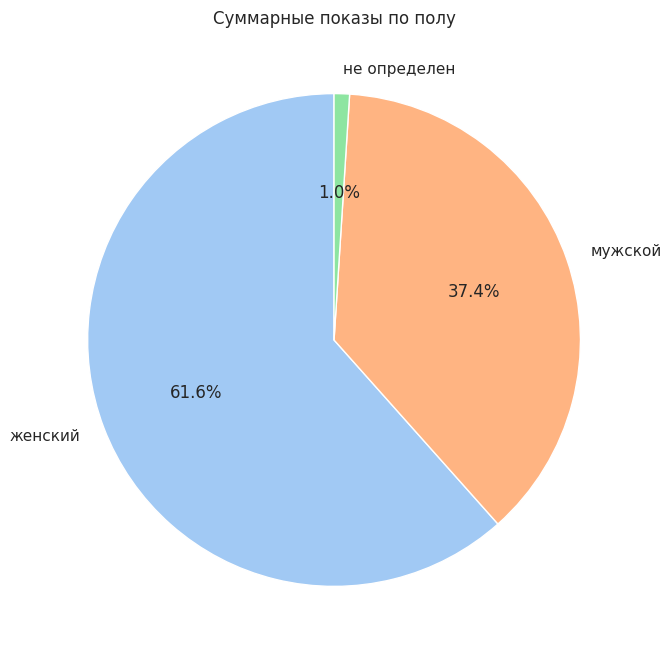

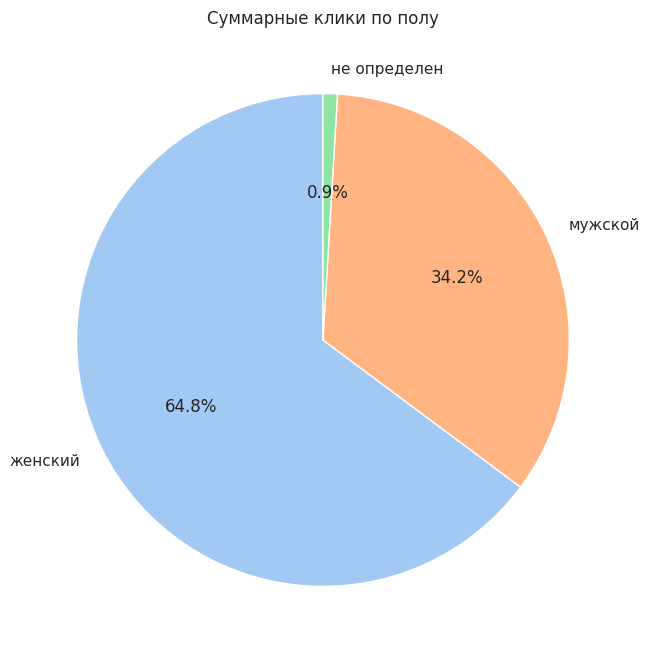

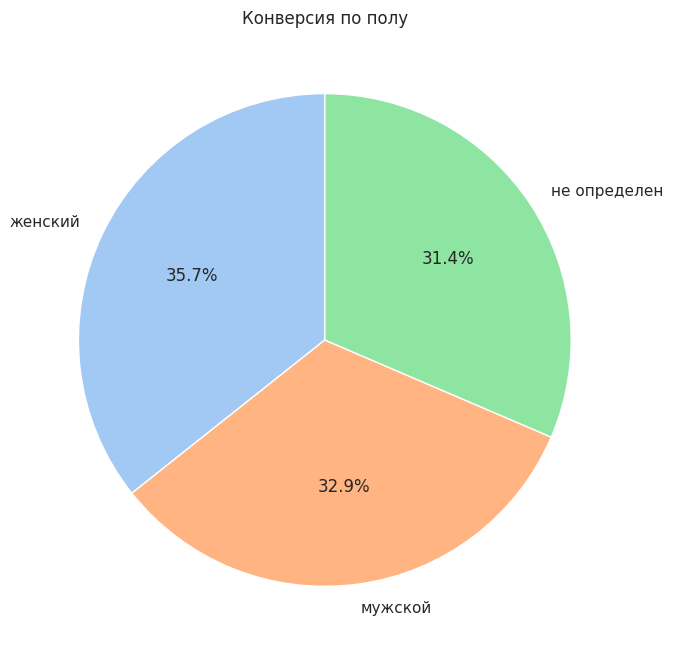

In [155]:
colors = sns.color_palette('pastel')
plt.figure(figsize=(8, 8))
plt.pie(agg_df1['Показы'], labels=agg_df1['Пол'], autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Суммарные показы по полу')
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(agg_df1['Клики'], labels=agg_df1['Пол'], autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Суммарные клики по полу')
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(agg_df1['CTR (%)'], labels=agg_df1['Пол'], autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Конверсия по полу')
plt.show()

Итак, видим, что количество компаний одинаково для всех полов, при этом женщинам чаще показывают рекламу, и именно они чаще совершают клики. Как ни странно, конверсия между полами отличается незначительно

In [269]:
agg_df2 = adgrants.groupby('Уровень платежеспособности').agg({'№ Кампании':'nunique','Показы':'sum','Взвешенные показы':'sum','Клики':'sum','CTR (%)':'mean'}).reset_index()
agg_df2['CR'] = agg_df2['Клики']/agg_df2['Показы']*100
display(agg_df2.style.format({
    'CTR (%)': '{:.2%}',
    'CR': '{:.2%}'
}))

,Уровень платежеспособности,№ Кампании,Показы,Взвешенные показы,Клики,CTR (%),CR
0,1%,24,95566,95566,193,32.65%,20.20%
1,2-5%,24,835015,835015,1675,35.91%,20.06%
2,6-10%,24,1013486,1013486,2121,36.91%,20.93%
3,Остальные,24,7909519,7909519,37254,53.80%,47.10%


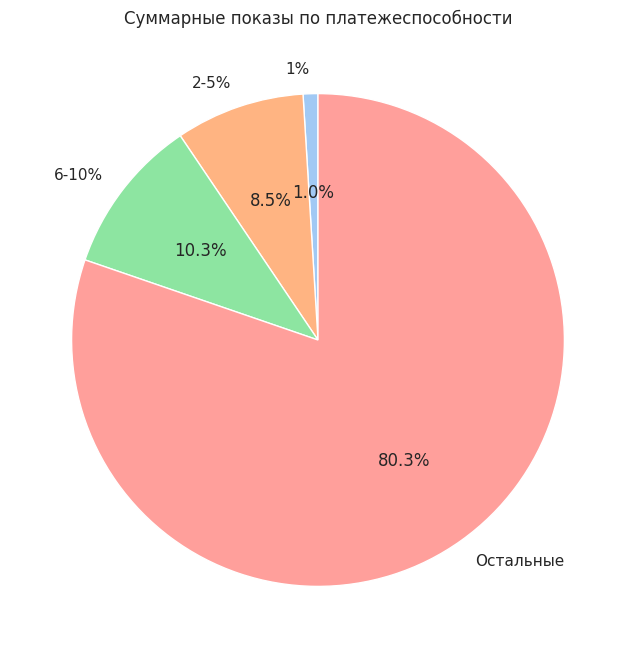

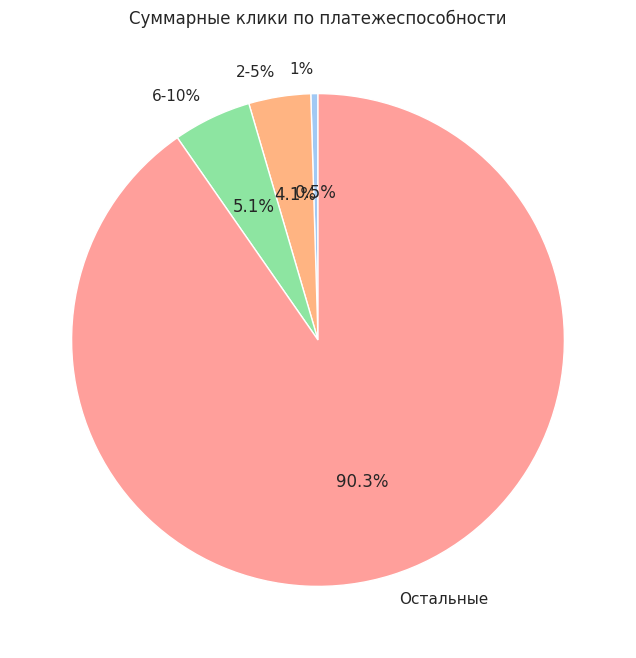

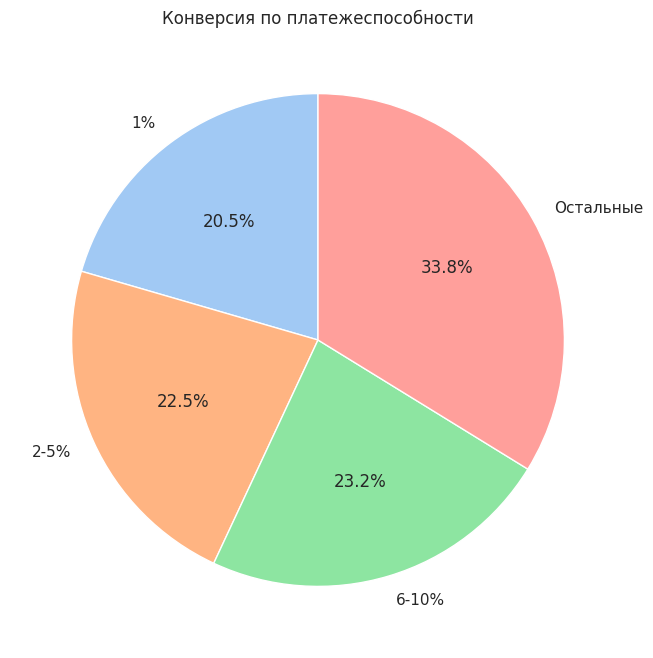

In [157]:
colors = sns.color_palette('pastel')
plt.figure(figsize=(8, 8))
plt.pie(agg_df2['Показы'], labels=agg_df2['Уровень платежеспособности'], autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Суммарные показы по платежеспособности')
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(agg_df2['Клики'], labels=agg_df2['Уровень платежеспособности'], autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Суммарные клики по платежеспособности')
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(agg_df2['CTR (%)'], labels=agg_df2['Уровень платежеспособности'], autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Конверсия по платежеспособности')
plt.show()

Корректировки по сегментам расставлены верно, конверсии по данному срезу выражены довольно равномерно. Сделаю предположение, что в вопросе благотворительности данная опция для рекламной компании работает неудачно.Т.к.дополнительные затраты за топ-10% показывают конверсию хуже.

In [268]:
agg_df3 = adgrants.groupby('Возраст').agg({'№ Кампании':'nunique','Показы':'sum','Клики':'sum','CTR (%)':'mean'}).reset_index()
agg_df3['CR'] = agg_df3['Клики']/agg_df3['Показы']*100
display(agg_df3.style.format({
    'CTR (%)': '{:.2%}',
    'CR': '{:.2%}'
}))

,Возраст,№ Кампании,Показы,Клики,CTR (%),CR
0,18-24,24,1036426,2107,26.62%,20.33%
1,25-34,24,1809962,5041,38.45%,27.85%
2,35-44,24,1951690,7545,46.20%,38.66%
3,45-54,24,1466770,6157,50.85%,41.98%
4,младше 18,19,767967,2562,31.51%,33.36%
5,не определен,23,177044,580,39.43%,32.76%
6,старше 55,24,2643727,17251,66.06%,65.25%


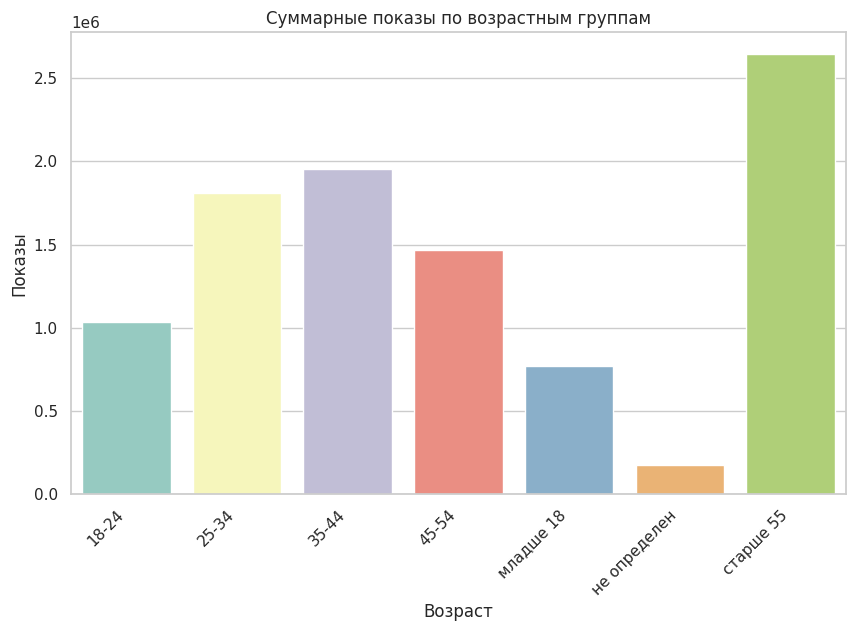

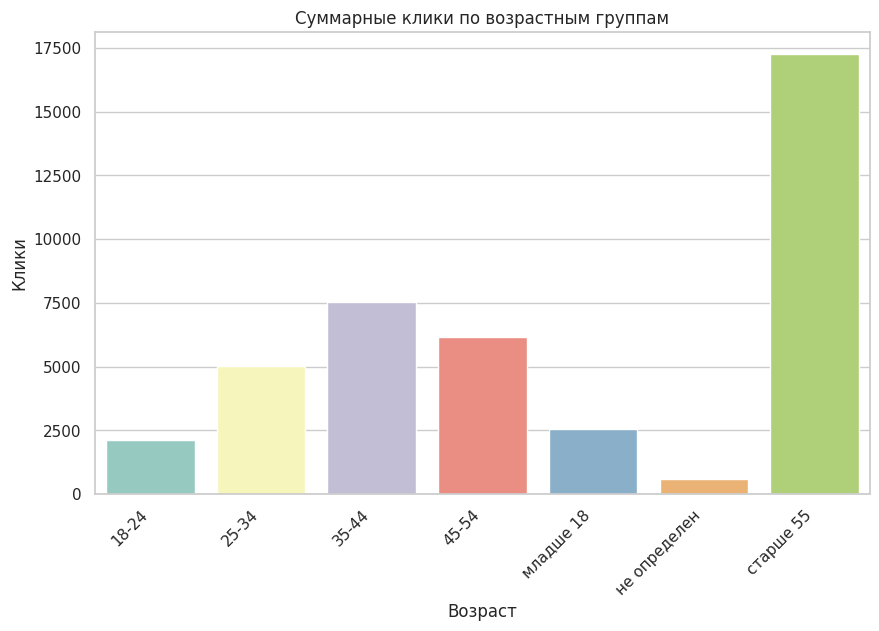

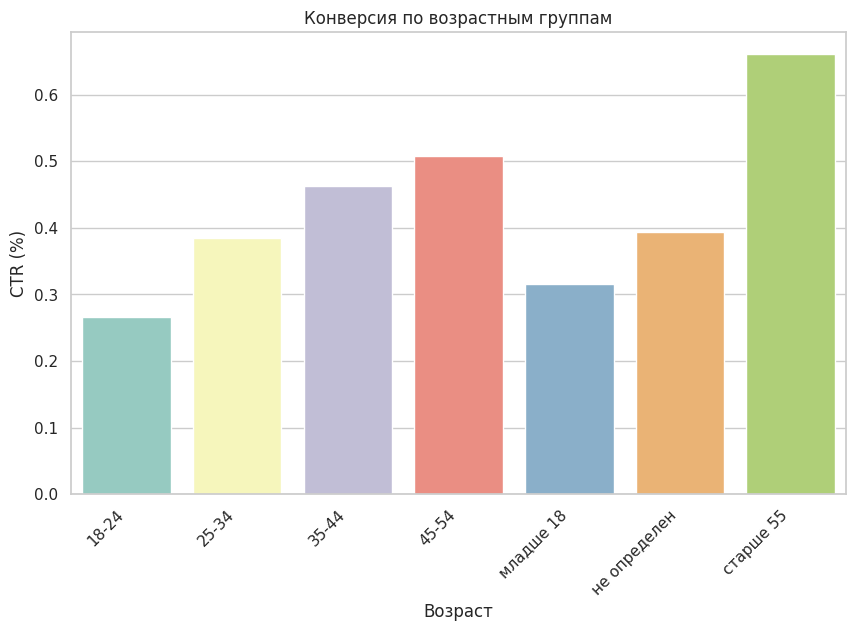

In [159]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='Возраст', y='Показы', data=agg_df3, palette="Set3")
plt.title('Суммарные показы по возрастным группам')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Возраст', y='Клики', data=agg_df3, palette="Set3")
plt.title('Суммарные клики по возрастным группам')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Возраст', y='CTR (%)', data=agg_df3, palette="Set3")
plt.title('Конверсия по возрастным группам')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

Данные показывают нам, что люди более старшего поколения чаще видят рекламунашего предприятия и чаще совершают клики.Люди до 24 лет совершают очень мало кликов. Можем выделить целевую аудиторию 35-54, связанную с расцветом финансовых возможностей, и группу старше 55, предлагаю субъективно связать это с сентиментальностью. График конверсии косвенно подтверждает наше предположение.

### Рекламные компании
В этом разделе детально изучим наши рекламные компании.

In [160]:
agg_df = adgrants.groupby('№ Кампании').agg({'Дата':'first','Показы':'sum','Клики':'sum','CTR (%)':'mean'}).reset_index()
agg_df

,№ Кампании,Дата,Показы,Клики,CTR (%)
0,82164908,2023-01-15,3497029,17963,0.385119
1,83825936,2023-03-14,909860,2315,0.416709
2,84171252,2023-03-14,458401,1481,0.294459
3,84173536,2023-03-14,134397,397,0.219602
4,84176025,2023-03-15,127204,348,0.209756
5,84199193,2023-03-14,339894,2742,0.688299
6,84641858,2023-03-14,505274,1867,0.374084
7,84668594,2023-03-17,85559,422,0.464341
8,84704851,2023-03-20,7348,4,0.121458
9,84707741,2023-03-14,180991,1072,0.446763


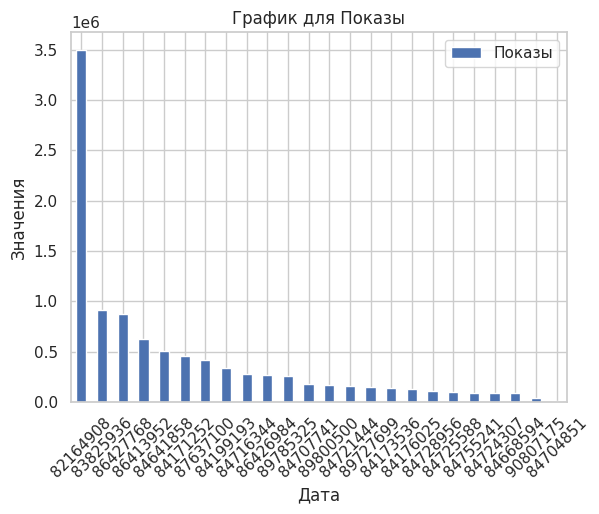

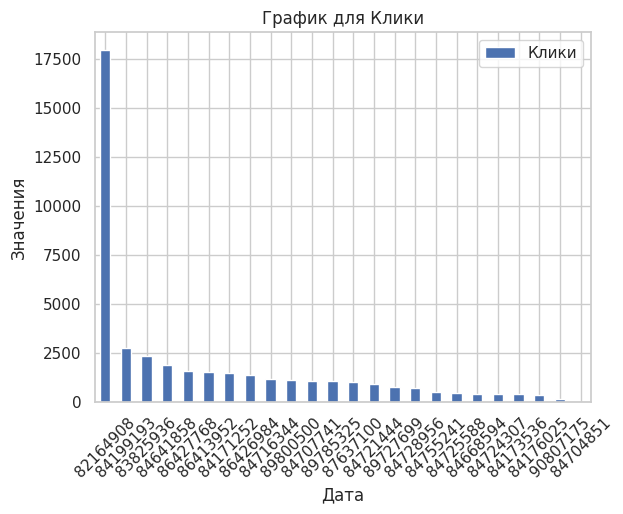

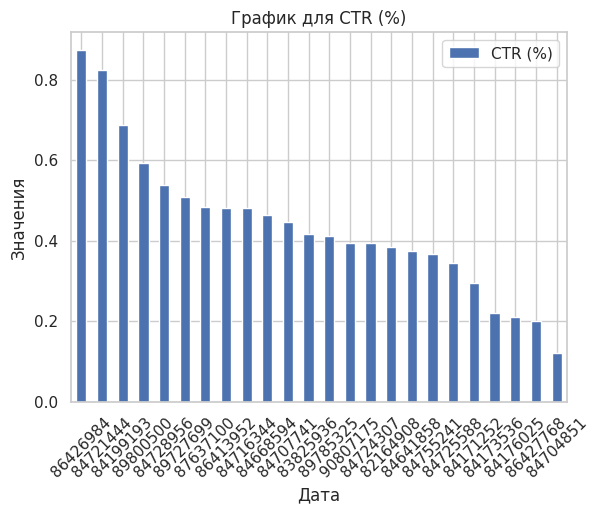

In [272]:
feature = ['Показы','Клики','CTR (%)']
for f in feature:
  agg_df.sort_values(by=f,ascending=False).plot(kind='bar', x='№ Кампании', y=f)
  plt.xlabel('Дата')
  plt.ylabel('Значения')
  plt.title(f"График для {f}")
  plt.xticks(rotation=45)
  plt.show()

Итак, с точки зрения конверсий лидируют компании 86426984 84721444 84199193 89800500. При этом с точки зрения показов и кликов они находятся далеко не в лидерах. Маркетологу стоит более детально изучить как именно эти вакансии были запущены, и какой результат дали.

## Денежные поступления
В этом разделе попытаемся соединить наши взносы с рекламными компаниями.
Из таблицы с платежами мы выберем дату первого платежа, т.к. по логике нам важно, что клиент увидел рекламу-кликнул-сделал донат.

In [162]:
print(f"Компании проводились с {adgrants['Дата'].min()} до {adgrants['Дата'].max()}")

date_1 = datetime(2023, 1, 2)
date_2 = datetime(2023, 12, 7)

Компании проводились с 2023-01-02 00:00:00 до 2023-12-07 00:00:00


In [163]:
df1 = final.groupby('Первый платеж').agg({'Сумма всего':'sum'}).reset_index().sort_values(by='Первый платеж')
df1

,Первый платеж,Сумма всего
0,2021-11-17,100
1,2021-11-18,30000
2,2021-11-24,15500
3,2021-11-25,22522
4,2021-11-26,13000
...,...,...
395,2023-11-02,1800
396,2023-11-03,4600
397,2023-11-04,52000
398,2023-12-03,5600


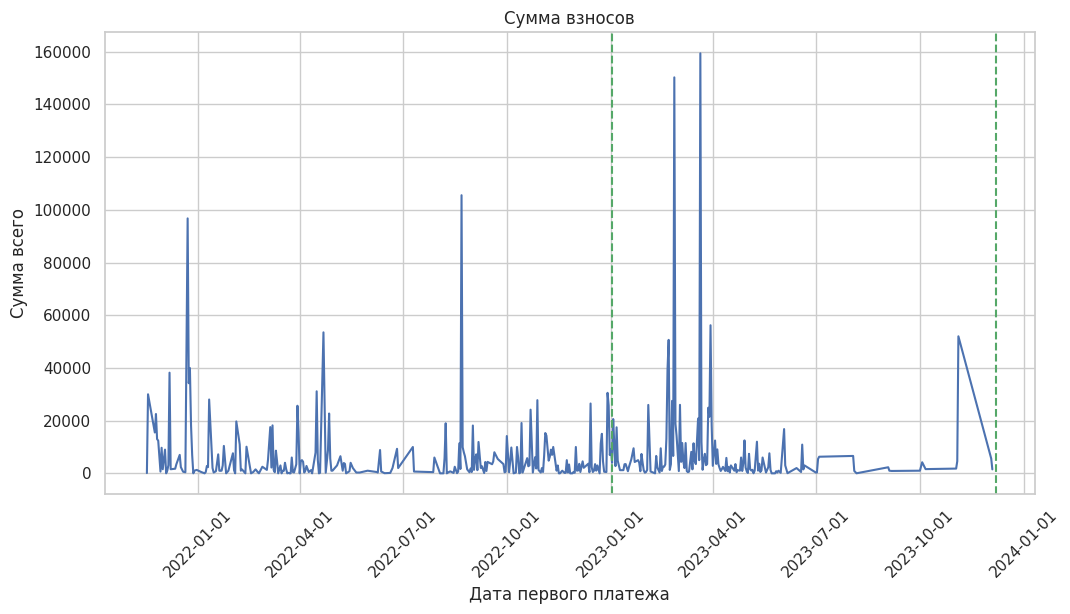

In [276]:
df1['Первый платеж'] = pd.to_datetime(df1['Первый платеж'])

plt.figure(figsize=(12, 6))
plt.plot(df1['Первый платеж'], df1['Сумма всего'], linestyle='-', color='b')
plt.title('Сумма взносов')
plt.xlabel('Дата первого платежа')
plt.ylabel('Сумма всего')
plt.grid(False)


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.axvline(x=date_1, color='g', linestyle='--')
plt.axvline(x=date_2, color='g', linestyle='--')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Зелёными линиями мы обозначили даты начала и конца рекламных компаний. С первого взгляда нельзя сказать, что наши рекламные компании оказали значительное влияние на сумму донатов. Да, есть аномально высокие значения, при этом остальное распределение ничем не выделяется.

In [165]:
df2 = final.groupby(['Первый платеж', 'Тип донора']).agg({'Сумма всего':'sum'}).reset_index().sort_values(by='Первый платеж')
df2['Тип донора'] = df2['Тип донора'].astype('category')
df2

,Первый платеж,Тип донора,Сумма всего
0,2021-11-17,разовый,100
1,2021-11-18,разовый,30000
2,2021-11-24,разовый,15500
3,2021-11-25,постоянный,20000
4,2021-11-25,разовый,2522
...,...,...,...
539,2023-11-03,разовый,4000
540,2023-11-04,разовый,52000
541,2023-12-03,разовый,5600
542,2023-12-04,постоянный,600


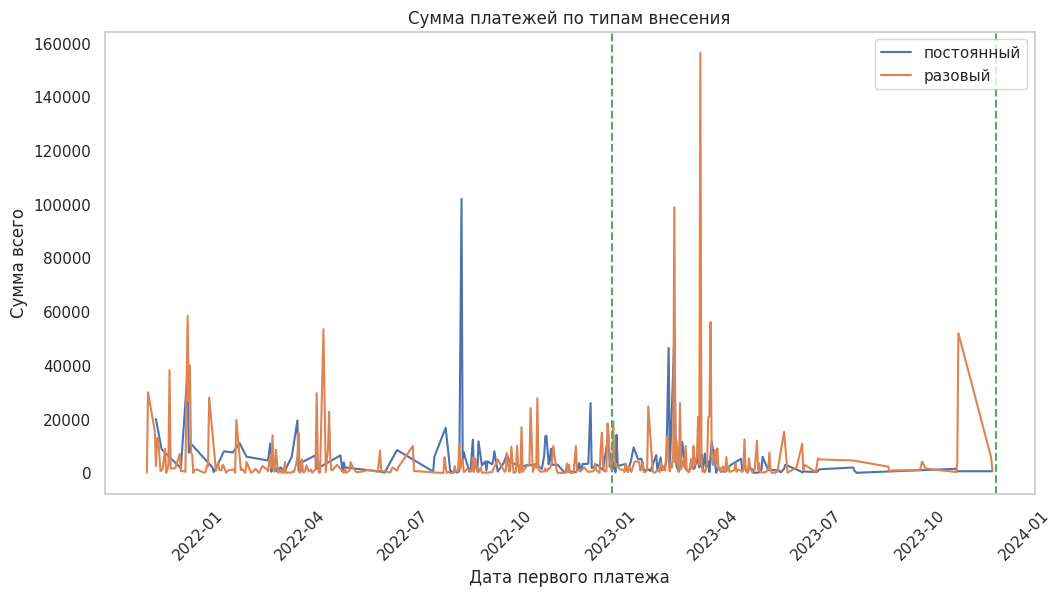

In [284]:
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x='Первый платеж', y='Сумма всего', hue='Тип донора', data=df2)
plt.title('Сумма платежей по типам внесения')
plt.xlabel('Дата первого платежа')
plt.ylabel('Сумма всего')
plt.grid(False)
plt.axvline(x=date_1, color='g', linestyle='--')
plt.axvline(x=date_2, color='g', linestyle='--')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.show()

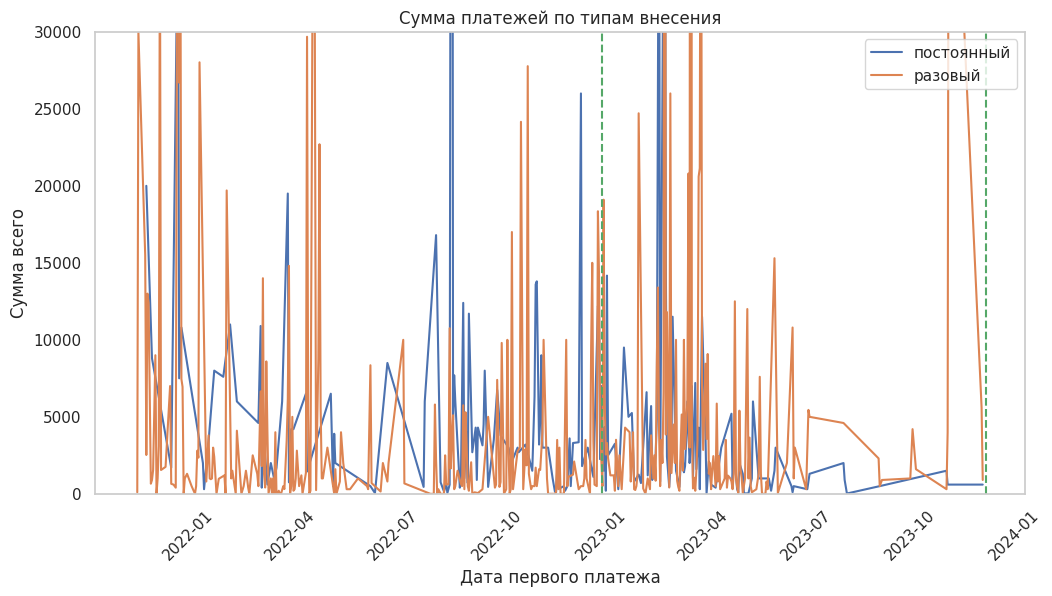

In [283]:
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x='Первый платеж', y='Сумма всего', hue='Тип донора', data=df2)
plt.title('Сумма платежей по типам внесения')
plt.xlabel('Дата первого платежа')
plt.ylabel('Сумма всего')
plt.grid(False)
ax.set_ylim(0, 30000)
plt.axvline(x=date_1, color='g', linestyle='--')
plt.axvline(x=date_2, color='g', linestyle='--')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.show()

На построенном графике видно, как увеличились значения для разовых оплат в период проведения компаний. При этом постоянные донаты снизились.

In [167]:
df3 = final.groupby(['Первый платеж', 'Типы оплаты']).agg({'Сумма всего':'sum'}).reset_index().sort_values(by='Первый платеж')
df3['Типы оплаты'] = df3['Типы оплаты'].astype('category')
df3

,Первый платеж,Типы оплаты,Сумма всего
0,2021-11-17,карта,100
1,2021-11-18,карта,30000
2,2021-11-24,карта,15500
3,2021-11-25,СБП,1122
4,2021-11-25,карта,21400
...,...,...,...
650,2023-11-03,неизвестно,4600
651,2023-11-04,неизвестно,52000
652,2023-12-03,неизвестно,5600
653,2023-12-04,карта,900


In [168]:
fig = px.bar(df3, x='Первый платеж', y='Сумма всего',color='Типы оплаты',barmode='stack')
fig.update_layout(title='Сумма платежей по способам оплаты',
                   xaxis_title='Дата платежа',
                   yaxis_title='Сумма платежей')
fig.add_shape(dict(type="line", x0=date_1, x1=date_1, y0=0, y1=1, xref='x', yref='paper', line=dict(color="red", dash="dash")))
fig.add_shape(dict(type="line", x0=date_2, x1=date_2, y0=0, y1=1, xref='x', yref='paper', line=dict(color="red", dash="dash")))
fig.update_xaxes(tickangle=45)
fig.show()

In [285]:
fig = px.bar(df3, x='Первый платеж', y='Сумма всего',color='Типы оплаты',barmode='stack')
fig.update_layout(title='Сумма платежей по способам оплаты',
                   xaxis_title='Дата платежа',
                   yaxis_title='Сумма платежей')
fig.add_shape(dict(type="line", x0=date_1, x1=date_1, y0=0, y1=1, xref='x', yref='paper', line=dict(color="red", dash="dash")))
fig.add_shape(dict(type="line", x0=date_2, x1=date_2, y0=0, y1=1, xref='x', yref='paper', line=dict(color="red", dash="dash")))
fig.update_xaxes(tickangle=45)
fig.update_yaxes(range=[0, 40000])
fig.show()

Из выбранных нами типов оплаты можно сказать, что в период проведения компаний, люди чаще стали пользоваться СБП, и меньше сделали перечислений через сервис банковских карт. Заметно, что есть повышение  пожертвований примерно с серидины февраля 2023 до начала апреля, но не видна структура типов оплаты.

In [169]:
df5 = final[final['Первый платеж'] <= date_1]
df5 = df5.groupby('Страны').agg({'Сумма всего':'sum'}).reset_index()

fig1 = px.bar(df5.sort_values(by='Сумма всего'), x='Сумма всего', y='Страны',
             labels={'Сумма всего': 'Сумма всего'},
             orientation='h')
fig1.update_xaxes(title_text='Сумма всего')
fig1.update_yaxes(title_text='Страны')

df6 = final[final['Первый платеж'] > date_1]
df6 = df6.groupby('Страны').agg({'Сумма всего':'sum'}).reset_index()

fig2 = px.bar(df6.sort_values(by='Сумма всего'), x='Сумма всего', y='Страны',
             labels={'Сумма всего': 'Сумма всего'},
             orientation='h')
fig2.update_xaxes(title_text='Сумма всего')
fig2.update_yaxes(title_text='Страны')

fig = make_subplots(rows=1, cols=2, shared_yaxes=False)

fig.add_trace(fig1['data'][0], row=1, col=1)
fig.add_trace(fig2['data'][0], row=1, col=2)

fig.update_xaxes(title_text='Сумма всего', row=1, col=1)
fig.update_xaxes(title_text='Сумма всего', row=1, col=2)
fig.update_layout(title_text="Сумма взносов по  странам до и после рекламных компаний", title_x=0.5)
fig.show()

До проведения компаний среди стран-донатеров можно выделить Россию, США,Швейцарию, Нидерланды, Турцию. После старта рекламы Выделим Россию, Швецию, США, Израиль. Также видим, что очень много неопознанных платежей. Вряд ли можем рассчитыватьна ощутимые донаты из других стран.

В качестве финального шага в нашем исследовании, проведём непараметрический тест, чтобы подтвердить или опровергнуть наши догадки.

In [170]:
sample_1 = final[final['Первый платеж'] < date_1]['Сумма всего']
sample_2 = final[final['Первый платеж'] >= date_1]['Сумма всего']

Вводим гипотезу

Н0: Средний платеж в первой выборке меньше или равен среднему платежу во второй выборке (μ1 <= μ2)

Н1: Средний платеж в первой выборке больше среднего платежа во второй выборке (μ1 > μ2)

'Всего значений: '

839

630

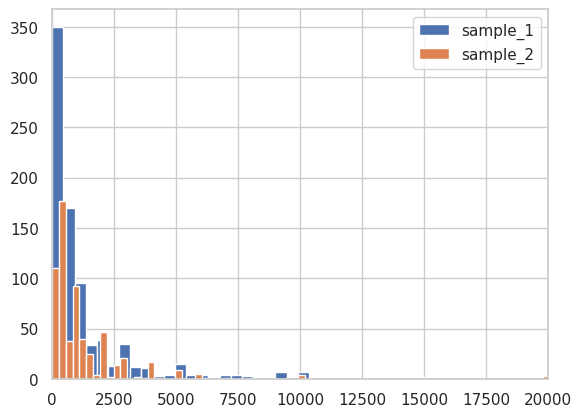

Шапиро-Вилка


0.0

1.471363387541058e-43

'Манн-Уитни. Двусторонний'

4.1236981099304415e-05

In [288]:
# Проверим распределения на нормальность, построив гистограммы:
display('Всего значений: ', len(sample_1), len(sample_2))
fig, ax = plt.subplots()
ax = sample_1.hist(bins=200, label='sample_1')
ax = sample_2.hist(bins=200, label='sample_2')
ax.set_xlim(0, 20000)
ax.legend()
plt.show()

# ИЛИ
# Проверим на нормальность распределения с помощью теста Шапиро-Вилка:
print('Шапиро-Вилка')
s, p = stats.shapiro(sample_1)
display(p)
s, p = stats.shapiro(sample_2)
display(p)
# Значения p близкие к 0, следовательно распределения значительно отличаются от нормального распределения.

# тест:
statistic, p_value = stats.mannwhitneyu(sample_1, sample_2, alternative='two-sided')
display('Манн-Уитни. Двусторонний', p_value)

# Значение p_value = 4.1236981099304415e-05 значительно меньше 0,05, выборки различаются.

In [171]:
statistic, p_value = stats.mannwhitneyu(sample_1, sample_2, alternative='greater')

print("Статистика U =", statistic)
print("p-значение =", p_value)

alpha = 0.05

if p_value < alpha:
    print("Отклоняем нулевую гипотезу в пользу альтернативной гипотезы.")
else:
    print("Нет оснований отклонять нулевую гипотезу.")

Статистика U = 231397.0
p-значение = 0.9999793926158737
Нет оснований отклонять нулевую гипотезу.


## Вывод
В ходе нашего исследования были произведены следующие действия:
1. Загрузили и очистили наши датасеты.
2. Свели данные по платежам и обработали дубликаты.
3. Обработали пропуски.
4. Посмотрели данные компаний в разрезе выделенных признаков.
5. Изучили поступление денег в различных срезах.

В качестве итоговых наблюдений, можно упомянуть следующее:
- К сожалению, данные получились очень грязные.
  1. Даты платежей не всегда совпадают, суммы платежейотличаются в системах.
  2. Система,которая выгружает таблицу donors, имеет неверные настройки, общий платёж не всегда равенсумме всех платежей клиента.
  2. Описания компаний и платёжных систем в donors крайне неинформативны.
  3. Отчёт из Директа настроен неверно (взвешенные метрики совпадают с невзвешенными).
  3. Файлы содержат данные в том числе за декабрь  2023 года, что не является корректным.
- Рекламные компании одинаково показываются для каждого пола. При этом, женщинам чаще показывают рекламу, и именно они чаще совершают клики. Однако, конверсия в клик у обоих полов примерно одинакова.
- В вопросе благотворительности опция топ-10% для рекламной компании работает неудачно.Т.к. эти сегменты показывают конверсию хуже.   
- Люди более старшего поколения чаще видят рекламу предприятия и чаще совершают клики. Можем выделить целевую аудиторию 35-54, связанную с расцветом финансовых возможностей, и группу старше 55, предлагаю субъективно связать это с сентиментальностью.
- Компании лидеры по конверсии очень  сильно проседают по просмотрам и кликам. Ситуация зеркальна: лидеры в абсолютных показателях очень проседают по конверсии.
- В период проведение компаний увеличились значения для разовых оплат. При этом постоянные донаты снизились.
- В период проведения компаний, люди чаще стали пользоваться СБП, и меньше сделали перечислений через сервис банковских карт.
- Анализ донатов постранам показал, что расчитывать на международную помощь смысла не имеет. Доля иностранных пожертвований довольно низкая, а список стран-топдонатеров изменился после рекламы.
- На основе непараметрического теста нельзя отклонить гипотезу о том, что средний взнос в период рекламы больше платежа в период отсутствия рекламы.

Также хочу отметить, что в открытом доступе есть ряд исследований на схожую тематику, говорящих приблизительно о следующем: чем больше средств тратится на рекламу и управление, тем больше НКО удаётся привлекать денег. При этом, возникает дисбаланс, т.к. меньше денег остаётся на саму цель сбора. Таким образом,существует некоторое недопонимание когда наступает момент, в который средства нужно тратить на цель, а не на привлечение. Для поиска этой грани от заказчика требуется больше внутренних данных, связанных с результатами сборов и управленческой отчётности (бддс,бдр).

Ссылка на презентацию: https://docs.google.com/presentation/d/1G4YoofX7aAm0C0Nnu-o0MqOlzQmck_ZU/edit?usp=sharing&ouid=100216368824867598230&rtpof=true&sd=true